Tracked element 1 (SourceBasic, stage 0)


/Users/carlal/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Tracked element 2 (StageNonlinear1D, stage 1)


unable to open /Users/carlal/UiO/python/OPAL/runscript_interstage.ele in mode r: No such file or directory
/Users/carlal/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Tracked element 3 (InterstageELEGANT, stage 1)
Tracked element 4 (StageNonlinear1D, stage 2)
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2355977466304D+01   r2 =  0.2034707480578D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2355977466304D+01   r2 =  0.2034707480578D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2355977466304D+01   r2 =  0.2034707480578D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above

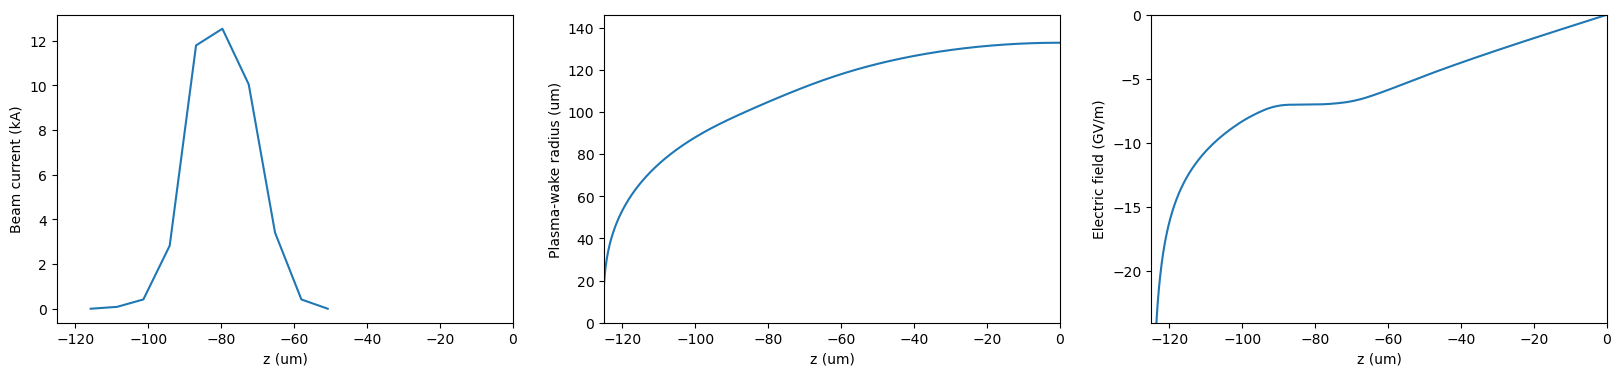

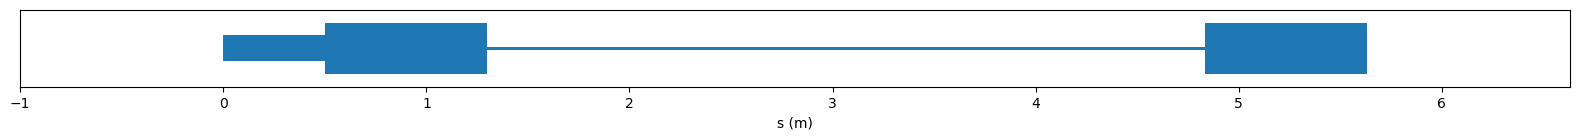

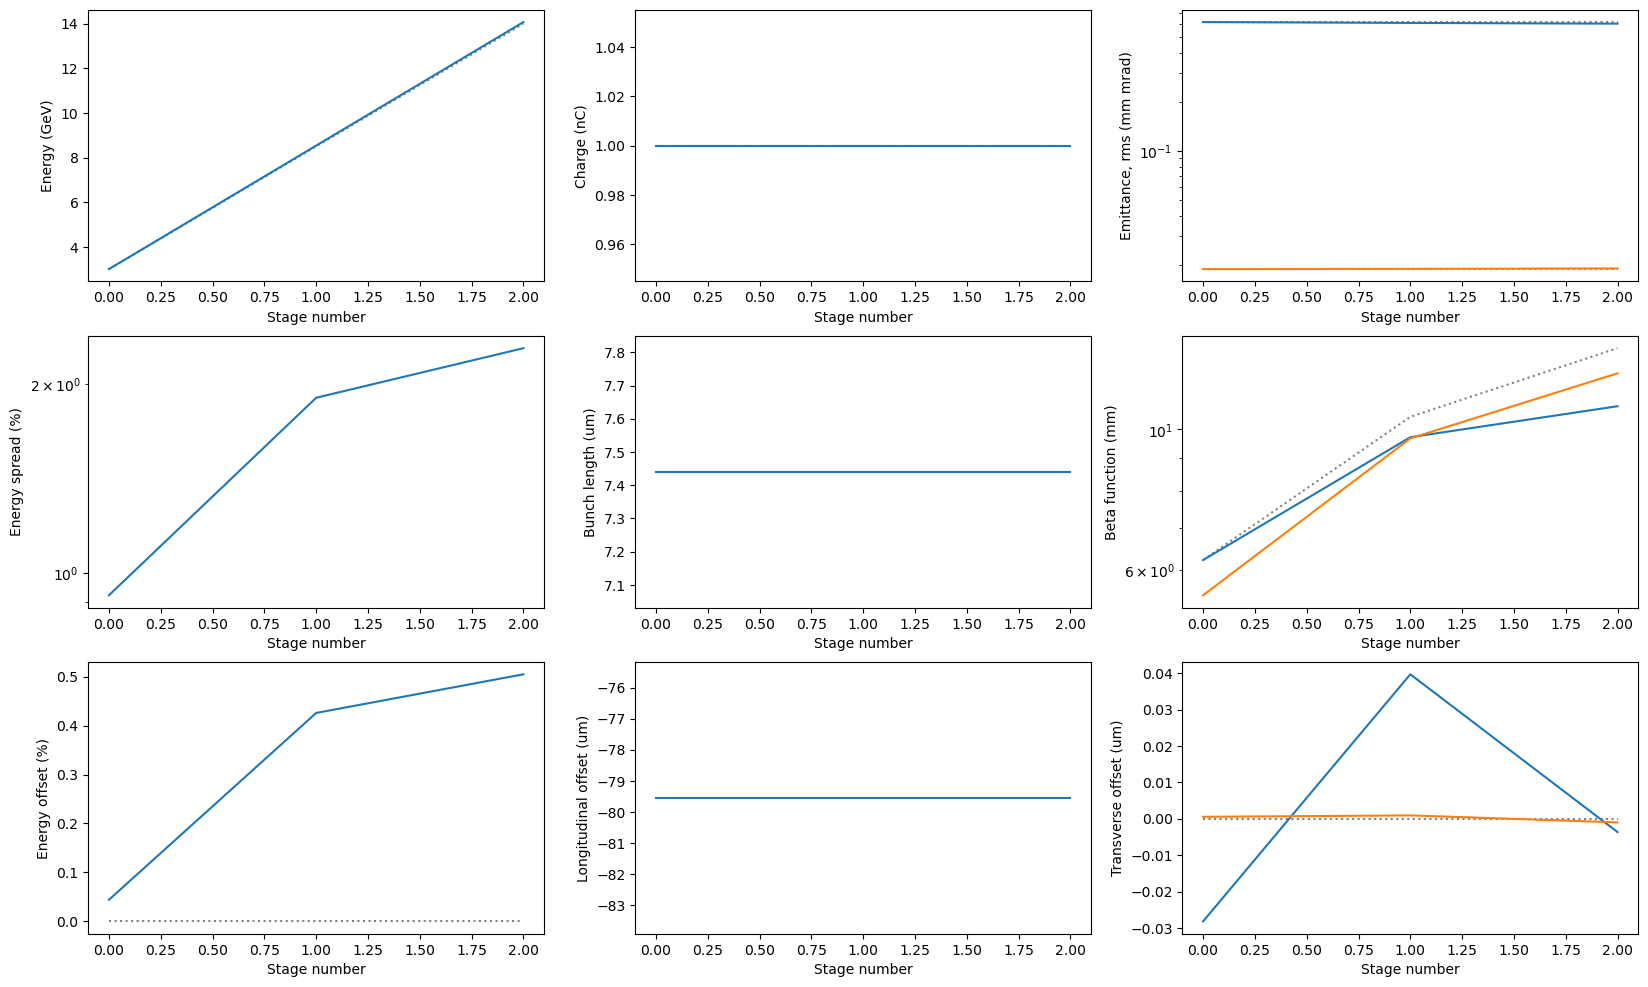

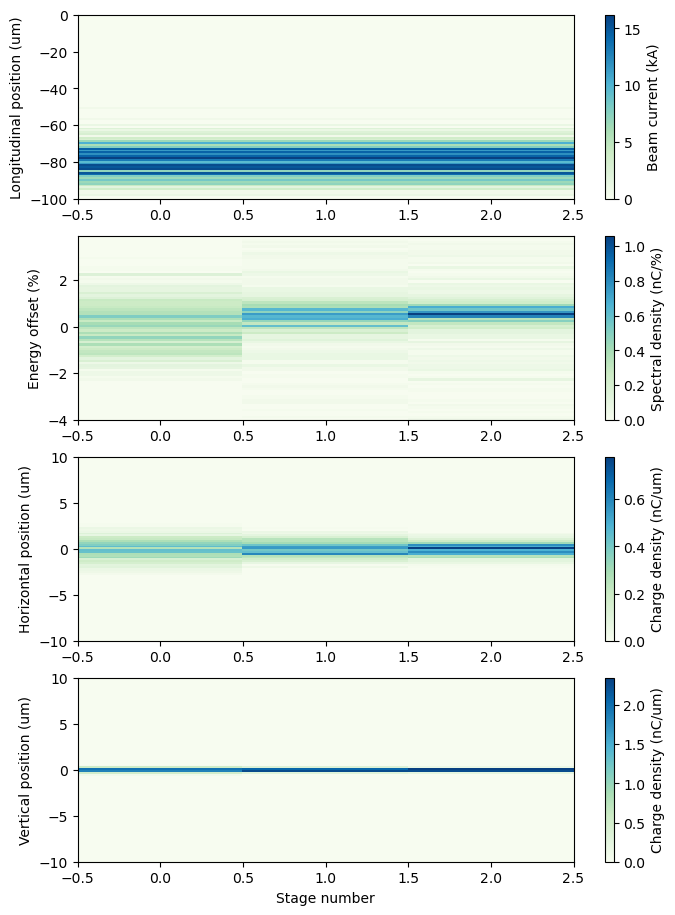

In [1]:
import sys
sys.path.append('../')
from opal import SourceBasic, StageNonlinear1D, InterstageELEGANT, LinacMultistage
from opal.utilities.plasmaphysics import beta_matched
import numpy as np

# define stage
stage = StageNonlinear1D()
stage.deltaE = 5.5e9 # [eV]
stage.L = 0.8 # [m]
stage.n0 = 1e22 # [m^-3]
stage.kRb = 2.5

# define beam
source = SourceBasic()
source.L = 0.5 # [m]
source.Q = -1e-9 # [C]
source.E0 = 3e9 # [eV]
source.sigE = 0.01*source.E0 # [eV]
source.sigz = 8e-6 # [m]
source.z = -79.5e-6 # [m]
source.emitnx = 1e-6 # [m rad]
source.emitny = 0.03e-6 # [m rad]
source.betax = beta_matched(stage.n0, source.E0) # [m]
source.betay = source.betax
source.Npart = 500

# define interstage
interstage = InterstageELEGANT()
interstage.beta0 = lambda E: beta_matched(stage.n0, E) # [T]
interstage.Bdip = 0.5 # [T]
interstage.Ldip = lambda E: 0.8 * np.sqrt(E/10e9) # [m(eV)]

# define linac
linac = LinacMultistage(source, stage, interstage, 2)

# track particles
linac.track(quiet=False)

# plot survery and beam evolution
stage.plotWakefield(source.track())
linac.plotSurvey()
linac.plotEvolution()
linac.plotWaterfalls()